In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.2 MB/s eta 0:00:00


In [14]:
import numpy as np
import easyocr, cv2
from google.colab.patches import cv2_imshow

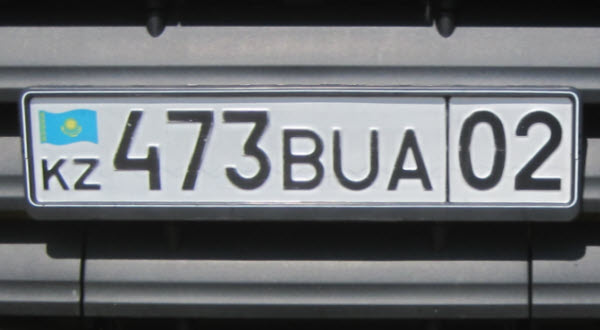

In [21]:
path_img = r'/content/data/plate-3.jpeg'
img = cv2.imread(path_img)
cv2_imshow(img)

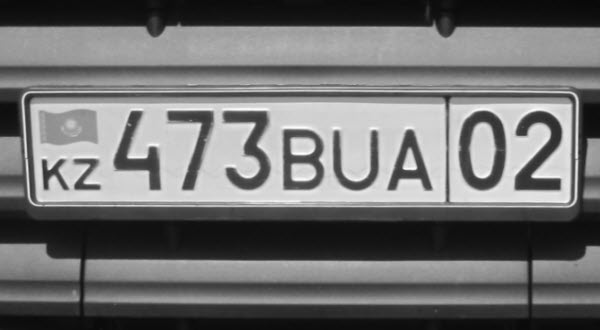

In [10]:
# Цветное изображение преобразуется в градации серого для упрощения дальнейшей обработки
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

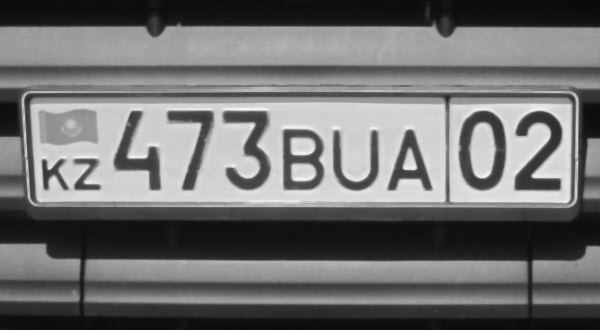

In [9]:
# Применение медианного фильтра к изображению помогает убрать шум. В данном случае, используется ядро размером 3x3
noise=cv2.medianBlur(gray,3)
cv2_imshow(noise)

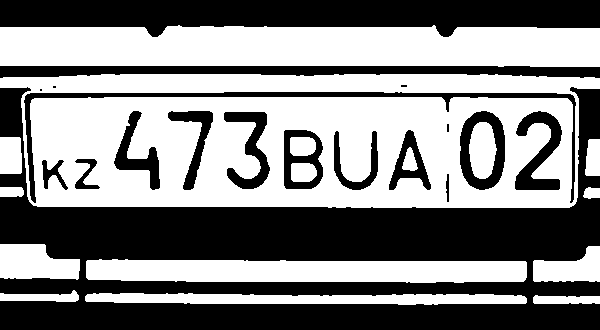

In [27]:
# После предварительной обработки изображение бинаризуется (преобразуется в черно-белое) с использованием метода Оцу
thresh = cv2.threshold(noise, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] # by using OR operator '|', we're instructing OpenCV to perform thresholding using both the binary thresholding method and Otsu's method
cv2_imshow(thresh)

In [12]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [28]:
result = reader.readtext(noise)
result

[([[37, 151], [107, 151], [107, 195], [37, 195]], 'Kz', 0.4494351104875793),
 ([[102, 98], [579, 98], [579, 206], [102, 206]],
  '473BUAJ02',
  0.3591523760806028)]

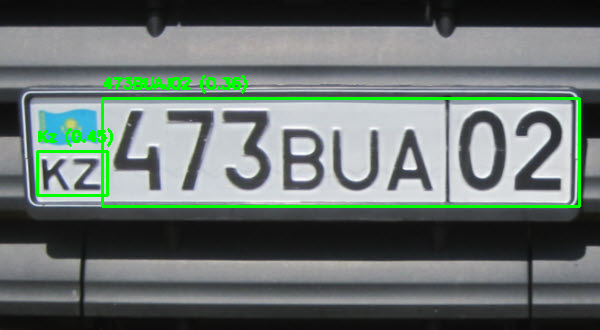

In [29]:
for box, label, confidence in result:
    box = np.array(box, dtype=np.int32)
    cv2.polylines(img, [box], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.putText(img, f"{label} ({confidence:.2f})", (box[0][0], box[0][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(img)